In [1]:
%load_ext autoreload
%autoreload 2
from snippets.loader import *

from torchvision.datasets import MNIST
mnist = MNIST(root='~/data/', train=True, transform=None, target_transform=None, download=True, )
tr_images = mnist.data
tr_targets = mnist.targets
mnist = MNIST(root='~/data/', train=False, transform=None, target_transform=None, download=True)
val_images = mnist.data
val_targets = mnist.targets

print(tr_images.shape, val_images.shape)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
logger.info(f'Working on {"GPU" if device is "cuda" else "CPU"}')

2020-02-23 13:08:06.966 | INFO     | __main__:<module>:16 - Working on GPU


torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [2]:
from itertools import permutations
qs = [0,25,50,75]
locs = list(set(permutations([0,0,1,1,2,2,3,3], 2)))
qs = [(qs[x], qs[y]) for x,y in locs]
len(qs)

16

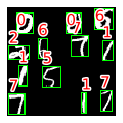

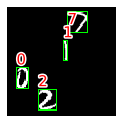

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


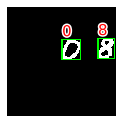

In [3]:
def crop(im):
    a, b = np.nonzero(im).T
    y,x,Y,X = min(a),min(b),max(a),max(b)
    return im[y:Y,x:X]
def patch():
    IM = np.zeros((100,100))
    bbs, cls = [], []
    regions = list(range(len(qs)))
    xys = qs
    for _ in range(1 + randint(12)):
        region = regions.pop(randint(len(regions)))
        ix = randint(60000)
        im = crop(tr_images[ix])
        label = tr_targets[ix]
        h,w = im.shape
        x,y = xys[region]
        x,y = x+randint(25-w), y+randint(25-h)
        IM[y:y+h,x:x+w] = im
        bbs.append(BB(x,y,x+w,y+h))
        cls.append(label.item())
    
    return IM, bbs, cls
for _ in range(3):
    a,b,c = patch()
    show(a, bbs=b, th=1, texts=c)

In [6]:
dumpdill([patch() for _ in range(2000)], 'mnist.train.16.data')

2020-02-23 13:09:49.913 | INFO     | snippets.loader:dumpdill:129 - Dumped object @ mnist.train.16.data


In [7]:
dumpdill([patch() for _ in range(200)], 'mnist.val.16.data')

2020-02-23 13:10:01.436 | INFO     | snippets.loader:dumpdill:129 - Dumped object @ mnist.val.16.data
